PROJETO CALL CENTER (Relatório de Vendas)
___________________________________________________________

ETL do Projeto
-------------------------------------------------

In [1]:
#Importamos o pandas e os plotly's graph e express
#------------------------------------------------------------------------------------
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 

In [2]:
df = pd.read_csv('dataset.csv')

In [18]:
# Alteração da coluna 'Mês'. Onde há texto, substituímmos pelo número que representa aquele mês
#------------------------------------------------------------------------------------
df.loc[df['Mês'] == 'Jan', 'Mês'] = 1
df.loc[df['Mês'] == 'Fev', 'Mês'] = 2
df.loc[df['Mês'] == 'Mar', 'Mês'] = 3
df.loc[df['Mês'] == 'Abr', 'Mês'] = 4
df.loc[df['Mês'] == 'Mai', 'Mês'] = 5
df.loc[df['Mês'] == 'Jun', 'Mês'] = 6
df.loc[df['Mês'] == 'Jul', 'Mês'] = 7
df.loc[df['Mês'] == 'Ago', 'Mês'] = 8
df.loc[df['Mês'] == 'Set', 'Mês'] = 9
df.loc[df['Mês'] == 'Out', 'Mês'] = 10
df.loc[df['Mês'] == 'Nov', 'Mês'] = 11
df.loc[df['Mês'] == 'Dez', 'Mês'] = 12

In [19]:
#Alteração de variáveis
#------------------------------------------------------------------------------------
df['Chamadas Realizadas'] = df['Chamadas Realizadas'].astype(int)
df['Dia'] = df['Dia'].astype(int)
df['Mês'] = df['Mês'].astype(int)


#Aqui vamos retirar o padrão 'R$ ' que há na coluna 'Valor pago'
#------------------------------------------------------------------------------------
df['Valor Pago'] = df['Valor Pago'].str.lstrip('R$ ')
df['Valor Pago'] = df['Valor Pago'].astype(int)

In [23]:
df.loc[df['Status de Pagamento'] == 'Pago', 'Status de Pagamento'] = 1
df.loc[df['Status de Pagamento'] == 'Não pago', 'Status de Pagamento'] = 0

In [25]:
df['Status de Pagamento'] = df['Status de Pagamento'].astype(int)

Construção dos Gráficos
------------------------------------------------------

Comentando as variáveis criadas
____________________________________

In [28]:
#gpVendas equivale ao agrupamento de vendas total por equipe
#grafVendasE é o nosso gráfico de vendas total por equipe
#gpChamados equivale ao agrupamento do total de chamado  por dia do mês
#grafChamadosD é o nosso gráfico total de chamados por dia do mês

Gráfico: Total de Vendas x Equipe
_______________________________________

In [32]:
#Agrupamos a soma de vendas, representado pela coluna 'Valor Pago', por 'Equipe', aplicando o seu index padrão com o 'reset.index()'
gpVendas = df.groupby('Equipe')['Valor Pago'].sum().reset_index()

In [40]:
#Construímos um gráfico de barras na horizontal, aplicando ao eixo x a soma dos valores e o eixo y as equipes.
grafVendasE = go.Figure(go.Bar(
    #eixo x recebendo os valores
    x = gpVendas['Valor Pago'],
    
    #eixo y recebendo o nome das equipes
    y = gpVendas['Equipe'],
    
    #orientação do tipo barras em horizontal
    orientation = 'h',
    
    #posição do texto foi automática
    textposition = 'auto',
    
    #Este é o rótulo de dados
    text = gpVendas['Valor Pago'],
    insidetextfont = dict (family = 'Time', size = 12)
)
)

Gráfico: Média de Chamadas x Dia do Mês
_______________________________________

In [38]:
#Agrupamos a quantidade de chamados por dia, representado pela coluna 'Chamadas Realizadas', por 'Dia', aplicando o seu index padrão com o 'reset.index()'
gpChamados = df.groupby('Dia')['Chamadas Realizadas'].sum().reset_index()

In [67]:
#Construímos um gráfico de
grafChamadosD = go.Figure(
    go.Scatter(
        x = gpChamados['Dia'],
        y = gpChamados['Chamadas Realizadas'],
        mode = 'lines',
        fill = 'tonexty'
    )
)

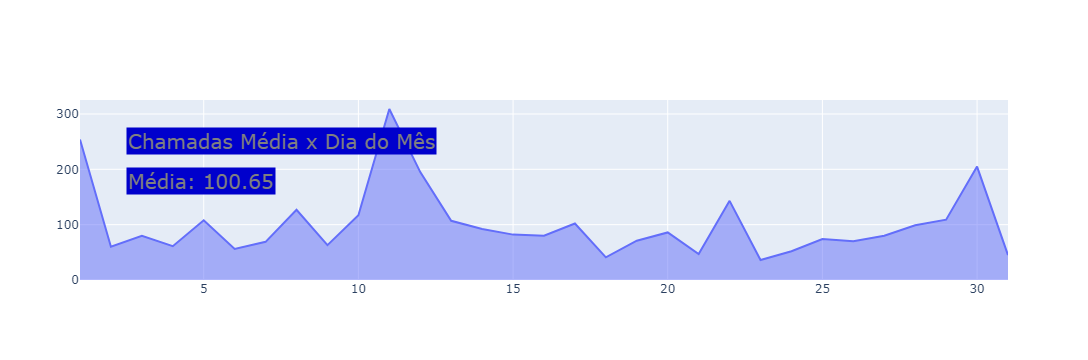

In [68]:
grafChamadosD.add_annotation(
    text = 'Chamadas Média x Dia do Mês',
    xref = "paper",
    yref = "paper",
    font = dict (
        size = 20,
        color = 'gray',
    ),
    align = "center",
    bgcolor = "rgba(0,0,0.8)",
    x = 0.05,
    y = 0.85,
    showarrow = False
)
grafChamadosD.add_annotation(
    text =f"Média: {round(gpChamados['Chamadas Realizadas'].mean(), 2)}",
    xref = "paper",
    yref = "paper",
    font = dict(
                size = 20,
                color = 'gray'
    ),
    align = "center",
    bgcolor = "rgba(0,0,0.8)",
    x = 0.05,
    y = 0.55,
    showarrow = False        
)